# 중고차 가격 예측 미션
---

## 1. 데이터 로드

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head(2)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head(2)

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013


- id : 샘플 아이디
- title : 제조사 모델명
- odometer : 주행 거리
- location : 판매처(나이지리아 도시)
- isimported : 현지 사용 여부
- engine : 엔진 종류
- transmission : 트랜스미션 종류
- fuel : 연료 종류
- paint : 페인트 색상
- year : 제조년도
- target : 자동차 가격

## 2. 데이터 확인 및 분석전 전처리

### 2-1) 결측치 확인

In [4]:
train_df.isna().sum()

id              0
title           0
odometer        0
location        0
isimported      0
engine          0
transmission    0
fuel            0
paint           0
year            0
target          0
dtype: int64

=> 결측지 없음

### 2-2) 데이터 시각적 확인

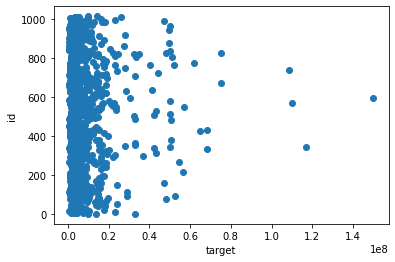

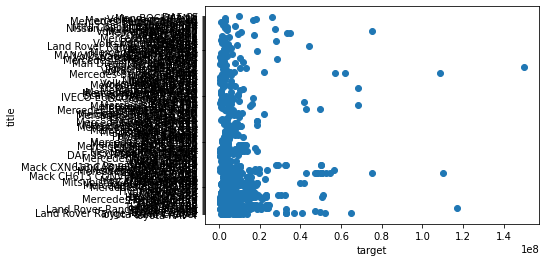

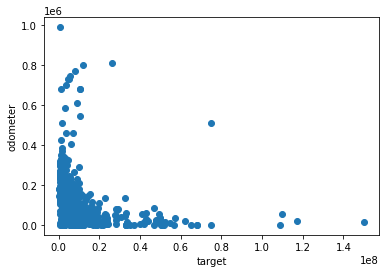

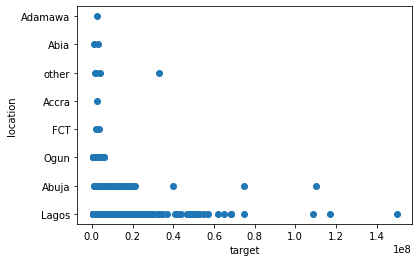

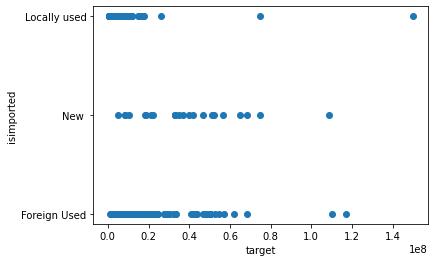

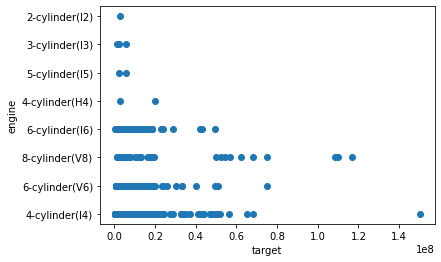

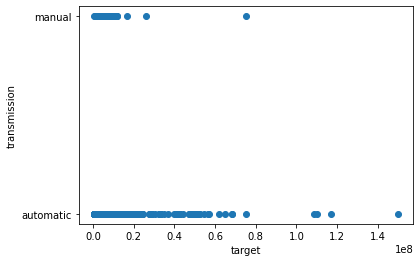

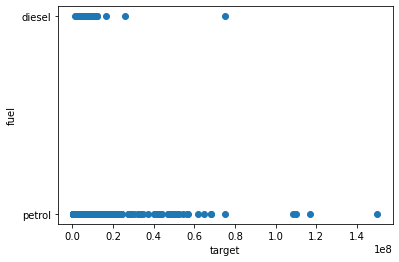

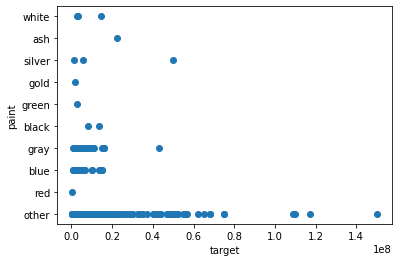

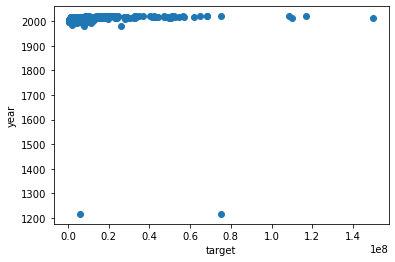

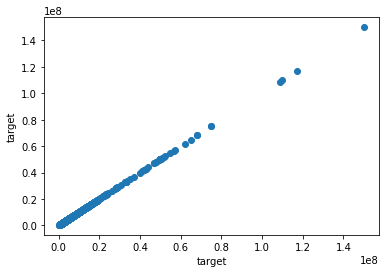

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in train_df.columns:
    plt.scatter(train_df['target'], train_df[i])
    plt.xlabel('target')
    plt.ylabel(i)
    plt.show()

- 분석
    - 중고차의 경우 한가지의 요인이 가격에 영향을 미친다기보다는 복합적으로 작용한다. (하나의 피처가 선형성을 갖지는 않는다)
    - 색상의 경우 특정 색상이 가격에 영향을 주지는 않는 것으로 보인다 => 피쳐삭제
    - 주행거리의 경우 주행거리가 적을수록 가격이 올라가는 선형성을 보인다.
    - 차량기종은 너무 다양하기 때문에 하나의 브랜드로 통일하는것도 좋을 것으로 보인다 => 엔진, 연료, 트랜스미션, 브랜드가 차량기종을 설명할 수 있다.
    - 판매처는 Abuja와 Lagos 외에는 비슷한 가격대를 형성하니 통합해도 좋을 것으로 보인다.

### 2-3) 범주형 데이터 확인

1. title 확인

In [5]:
# title 요소 확인
train_df.title.unique()

array(['Toyota RAV 4', 'Toyota Land Cruiser',
       'Land Rover Range Rover Evoque', 'Lexus ES 350', 'Toyota Venza',
       'Toyota Corolla', 'Land Rover Range Rover Sport', 'Pontiac Vibe',
       'Toyota Tacoma', 'Lexus RX 350', 'Ford Escape', 'Honda Civic',
       'Volvo XC90', 'BMW 750', 'Infiniti JX', 'Honda Accord',
       'Mercedes-Benz ML 350', 'Toyota Camry', 'Hyundai Azera',
       'Lexus GX 460', 'BMW 325', 'Toyota Sienna', 'Honda Fit',
       'Honda CR-V', 'Hyundai Tucson', 'Ford Transit', 'Jaguar XJ8',
       'BMW X6', 'Mercedes-Benz C 300', 'Mitsubishi Galant',
       'Mercedes-Benz GL 450', 'Lexus RX 300', 'Toyota Highlander',
       'Mitsubishi CANTER PICK UP', 'Nissan Titan', 'Lexus IS 250',
       'Mercedes-Benz 200', 'Toyota Sequoia', 'Ford Explorer',
       'Hyundai ix35', 'Mack CH613 CONVENTIONAL CAB', 'Lexus CT 200h',
       'Lexus LX 570', 'Toyota Avensis', 'Toyota 4-Runner',
       'Mercedes-Benz GLE 350', 'Mercedes-Benz E 300', 'Toyota Avalon',
       'Chevrole

- 분석
    - 학습 데이터에 포함되지 않은 기종을 어떻게 처리할지 고민
    - 같은 회사의 차량이라도 현대의 아반떼, 제네시스처럼 기종에 따라 가격이 천차만별

In [38]:
# 브랜드 파생변수 생성
train_df['brand'] = train_df['title'].apply(lambda x : x.split()[0]) # 브랜드 생성
test_df['brand'] = test_df['title'].apply(lambda x : x.split()[0])

In [39]:
# train의 브랜드 요소 확인
train_df.brand.unique()

array(['Toyota', 'Land', 'Lexus', 'Pontiac', 'Ford', 'Honda', 'Volvo',
       'BMW', 'Infiniti', 'Mercedes-Benz', 'Hyundai', 'Jaguar',
       'Mitsubishi', 'Nissan', 'Mack', 'Chevrolet', 'Mazda', 'Lincoln',
       'Kia', 'Volkswagen', 'Acura', 'DAF', 'Man', 'Isuzu', 'IVM',
       'Porsche', 'MINI', 'Dodge', 'GMC', 'Iveco', 'Scania', 'GAC',
       'IVECO', 'Peugeot', 'Rolls-Royce', 'MAN-VOLKSWAGEN', 'Jeep',
       'ALPINA', 'Bentley', 'JMC', 'Mercedes-Benz/52', 'Audi'],
      dtype=object)

In [40]:
# test의 브랜드 요소 확인
test_df.brand.unique()

array(['Mercedes-Benz', 'Honda', 'Toyota', 'Iveco', 'Lexus', 'Nissan',
       'Volkswagen', 'Jeep', 'Ford', 'BMW', 'Mack', 'Land', 'Hyundai',
       'Peugeot', 'Volvo', 'Infiniti', 'Acura', 'Man', 'Fiat', 'MINI',
       'DAF', 'Mazda', 'Porsche', 'Mitsubishi', 'Chevrolet', 'Kia',
       'Pontiac', 'Rolls-Royce'], dtype=object)

In [41]:
# train과 test의 중복되지않는 브랜드 확인 -> ['Fiat']
not_dup_brand = []

for i in test_df.brand.unique():
    if i not in train_df.brand.unique():
        not_dup_brand.append(i)

print(not_dup_brand)

['Fiat']


- 분석
    - train data와 test data의 중복되지않는 브랜드 Fiat를 처리해야함
        - 비슷한 가격대의 브랜드로 바꾸기
    - 비슷한 가격대의 브랜드는 통합해도 괜찮아 보임.

2. location 확인

In [45]:
# 2-1. location 처리
def clean_location(x):
    '''location 정리 함수'''
    x = x.replace(' ', '')
    x = x.replace('State', '')
    return x

train_df.location = train_df.location.apply(clean_location)
test_df.location = test_df.location.apply(clean_location)

In [46]:
# location 요소 확인
train_df.location.unique()

array(['Lagos', 'Abuja', 'Ogun', 'FCT', 'Accra', 'other', 'Abia',
       'Adamawa'], dtype=object)

In [47]:
# train과 test 데이터에 중복되지 않은 location 확인 => ['Mushin', 'Arepoogunstate']
not_dup_location = []

for i in test_df.location.unique():
    if i not in train_df.location.unique():
        not_dup_location.append(i)

print(not_dup_location)

['Mushin', 'Arepoogunstate']


- 같은 지명이나 공백으로 나뉘어진 데이터 존재
    - 'Lagos' 와 'Lagos '
    - 'Abuja' 와 'Abuja '
- 같은 지역이나 이름만 다르게 되어있는 데이터 존재
    - 'Abia State' 와 'Abia'
    - 'Ogun State' 와 'Ogun'
    - 'Lagos State' 와 'Lagos'
- train과 test의 중복되지않은 location을 어떻게 처리할지 고민

3. isimported 확인

In [8]:
# isimported 요소 확인
train_df.isimported.unique()

array(['Foreign Used', 'New ', 'Locally used'], dtype=object)

- 분석
    - 별도의 전처리가 필요없어 보임

4. engine 확인

In [9]:
# engine 요소 확인
train_df.engine.unique()

array(['4-cylinder(I4)', '6-cylinder(V6)', '8-cylinder(V8)',
       '6-cylinder(I6)', '4-cylinder(H4)', '5-cylinder(I5)',
       '3-cylinder(I3)', '2-cylinder(I2)'], dtype=object)

In [42]:
# train과 test 데이터에 중복되지않는 엔진 -> 처리 필요
not_dup_engine = []

for i in test_df.engine.unique():
    if i not in train_df.engine.unique():
        not_dup_engine.append(i)

print(not_dup_engine)

['12-cylinder(V12)']


- 분석결과
    - 학습 데이터에 포함되지 않은 엔진을 어떻게 처리할지 고민

5. transmission 확인

In [10]:
# 5. transmission 확인
train_df.transmission.unique()

array(['automatic', 'manual'], dtype=object)

- 분석
    - 별도의 전처리가 필요없어 보임

In [11]:
# 6. fuel 확인
train_df.fuel.unique()

array(['petrol', 'diesel'], dtype=object)

- 분석
    - 별도의 전처리가 필요없어 보임

8. year 확인

In [30]:
# year 요소 확인
train_df.year.unique()

array([2016, 2019, 2012, 2007, 2010, 2004, 2008, 2018, 2009, 2013, 1996,
       2014, 2002, 2006, 2017, 1998, 2011, 2005, 2000, 2015, 2001, 1995,
       2003, 1999, 1985, 2020, 1994, 1991, 1218, 1982, 1997, 1217, 1980],
      dtype=int64)

- 분석결과
    - 1218, 1217 이라는 이상한 수치가 존재 -> 처리
    - 생산연도가 2022년을 넘어가거나 1900년보다 이전이면 주행거리와 모델로 연도를 유추한다. (별도의 모델 생성)

## 3. 전처리 함수

### 3-1) 불필요 속성 제거